In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math
import scipy as sp
import skimage
import os

from skimage.color import rgb2gray
from scipy.signal import convolve2d
from scipy.ndimage import rank_filter
from scipy.stats import norm
from PIL import Image
from utils import dist2, gen_dgauss, find_sift, harris
from utils import eucl_dist

dist 40


In [3]:
def im2double(im):
    min_val = np.min(im.ravel())
    max_val = np.max(im.ravel())
    out = (im.astype('float') - min_val) / (max_val - min_val)
    return out

In [4]:
print(os.getcwd()+'/uttower_left.jpeg')

/home/xiaobao/Python_Venvs/cv_venv/EME_174/Image_Stitching/uttower_left.jpeg


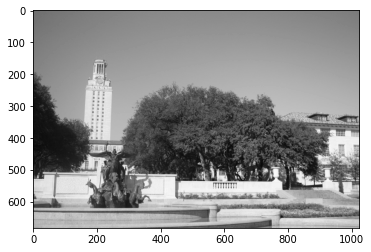

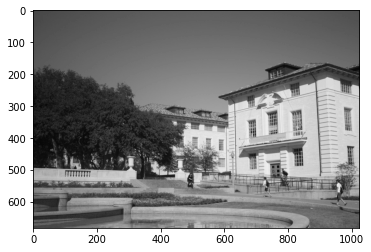

In [5]:
towerLeft = cv.imread(os.getcwd()+'/uttower_left.jpeg', 0)
towerRight = cv.imread(os.getcwd()+'/uttower_right.jpeg', 0)
towerLeft = cv.normalize(towerLeft.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
towerRight = cv.normalize(towerRight.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)

plt.figure()
plt.imshow(towerLeft, cmap=plt.get_cmap('gray'))
plt.figure()
plt.imshow(towerRight, cmap=plt.get_cmap('gray'))

### Detect Feature Points via Harris Detector

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]] [[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]
<class 'numpy.ndarray'>
(104, 2)


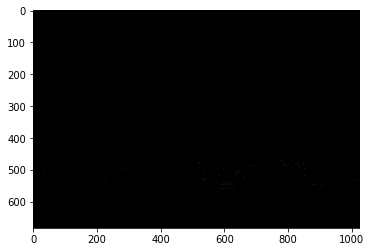

In [21]:
tower_harris_L, L_rows, L_cols = harris(towerLeft, sigma=1.0, thresh=0.3, radius=2.0)
print(type(tower_harris_L))
L_pts = np.vstack((L_rows, L_cols))
L_pts = L_pts.T
print(L_pts.shape)
plt.imshow(tower_harris_L, cmap=plt.get_cmap('gray'))

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]] [[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]
<class 'numpy.ndarray'>
(82, 2)


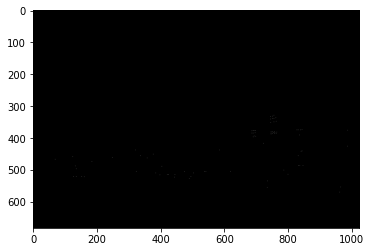

In [22]:
tower_harris_R, r_rows, r_cols = harris(towerRight, sigma=1.0, thresh=0.3, radius=2.0)
print(type(tower_harris_R))
R_pts = np.vstack((r_rows, r_cols))
R_pts = R_pts.T
print(R_pts.shape)
plt.imshow(tower_harris_R, cmap=plt.get_cmap('gray'))

### Compute Euclidian Distances between correspondance points

In [14]:
_dist1 = np.array([[2,2], [1,1], [2,2]])
_dist2 = np.array([[4,4], [5,5], [4,4]])

print(dist2(_dist1, _dist2))
print(np.diagonal(dist2(_dist1, _dist2)))

# foo_1 = np.array([[2, 2]])
# foo_2 = np.array([[4, 4]])
# print(eucl_dist(_dist1, _dist2))

[[ 8 18  8]
 [18 32 18]
 [ 8 18  8]]
[ 8 32  8]


In [23]:
# Get all possible distances between every pair of points
dists = np.sqrt(dist2(L_pts, R_pts))

# dists = np.diagonal(dists)
print(dists.shape)

(82, 104)


In [38]:
from sklearn.preprocessing import normalize 

def pt_matches(dists, thresh=None):
    """
    Retrieves putative matches of interest that are under some max distance
    Parameters
    ----------
    dists: numpy.ndarray [rows, cols] matrix of all possible distances between pairs of points
        Data of shape `(ndata, dimx)`
    thresh: float
        Normalized value from [0,1]
    Returns
    ----------
    matches: numpy.ndarray
        Indices of promising matches and their distances
    """
    matches = []
    # dist_norms = [float(i)/max(dists) for i in dists]
    # dist_norms = dists / np.sqrt(np.sum(dists ** 2))
    # print(dist_norms)
    dist_norms = normalize(dists, norm='l1')
    print(dist_norms.shape)
    # print(dist_norms[:10][:10])

    for n in range(0, dist_norms.shape[0]-1):
        for k in range(0, dist_norms.shape[1]-1):
            if dist_norms[n, k] < thresh:
                # print("small val ", k)
                dist_norms[n, k] = 0
    
    print(dist_norms)

    return dist_norms
        # val = dist_norms[n]
        # print(n, val)
        # if val < thresh:
            # matches.append([n, dists[n]])

    # return np.asarray(matches, dtype=np.float32)

pt_matches(dists, thresh=0.5)


(82, 104)
[[0.         0.         0.         ... 0.         0.         0.01356468]
 [0.         0.         0.         ... 0.         0.         0.0137238 ]
 [0.         0.         0.         ... 0.         0.         0.01397588]
 ...
 [0.         0.         0.         ... 0.         0.         0.00353147]
 [0.         0.         0.         ... 0.         0.         0.01345219]
 [0.0212393  0.00743383 0.0188473  ... 0.02422906 0.02433836 0.00320532]]


In [ ]:
nums = [1, 2, 3, 4, 5]
tmp = 4

nums = nums[tmp > 1 :]
print(nums)

[2, 3, 4, 5]
